<a href="https://colab.research.google.com/github/NavdeepTU/Capstone-Projects/blob/main/03.%20Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset
# Image processing
# Train Test Split
# CNN
# Evaluation
# Building a pregiction setup

In [2]:
! pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# API to fetch dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:04<00:00, 44.6MB/s]
100% 163M/163M [00:04<00:00, 36.9MB/s]


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the dependencies**

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_501.jpg', 'with_mask_1679.jpg', 'with_mask_2411.jpg', 'with_mask_276.jpg', 'with_mask_1789.jpg']
['with_mask_1979.jpg', 'with_mask_472.jpg', 'with_mask_862.jpg', 'with_mask_1221.jpg', 'with_mask_3565.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2829.jpg', 'without_mask_2428.jpg', 'without_mask_1017.jpg', 'without_mask_1300.jpg', 'without_mask_1013.jpg']
['without_mask_2211.jpg', 'without_mask_1809.jpg', 'without_mask_1397.jpg', 'without_mask_2178.jpg', 'without_mask_355.jpg']


In [10]:
# checking if dataset is balanced or not
print('Number of with mask images ', len(with_mask_files))
print('Number of without mask images ', len(without_mask_files))

Number of with mask images  3725
Number of without mask images  3828


**Creating Labels for the two class of Images**

with_mask --> 1

without_mask --> 0

In [11]:
with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)

In [12]:
# combining both the labels
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

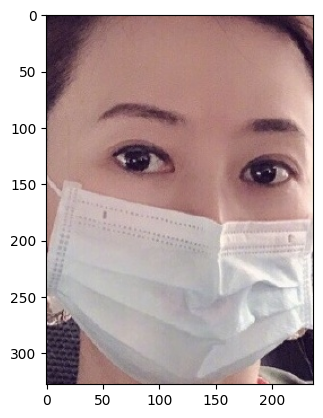

In [13]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_501.jpg')
imgplot = plt.imshow(img)
plt.show()

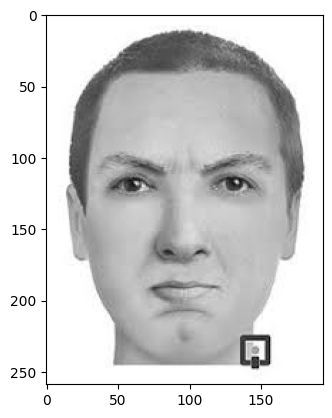

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2178.jpg')
imgplot = plt.imshow(img)
plt.show()

In [16]:
# Note that image size(width and height) are different

**Image Processing**

1. Resize the images

2. Convert the images to numpy arrays